# Tutorial: SU2 to DGL 

You may download SU2 here: https://su2code.github.io/download.html

-> In this tutorial, we will create data according to [this tutorial of NACA 0012](https://su2code.github.io/tutorials/Unsteady_NACA0012/), i.e., an airfoil subject to high flow speed of the wind

We suppose files are located in `data/` on this same folder, so change it accordingly

In [1]:
import numpy as np
import torch
import sys; sys.path.append('../../')
from src.utils.to_dgl import to_dgl

data_file = 'data/Unsteady_NACA0012/flow_00500.vtu'
mesh_file = 'data/Unsteady_NACA0012/unsteady_naca0012_mesh.su2'

Using backend: pytorch


## Transferring to DGL
The `to_dgl` function takes care the two files we need:

  - `data`: the data file containing the _field variables_
  - `mesh`: the mesh file containing the description of the mesh
  
If we want only special elements, we may use some `kwargs` such as "keys=..." to specify the desired results

In [2]:
graph = to_dgl(data=data_file, mesh=mesh_file)

/home/botu/.local/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


## Visualizationlxdown

100%|██████████| 57344/57344 [05:28<00:00, 174.53it/s]  


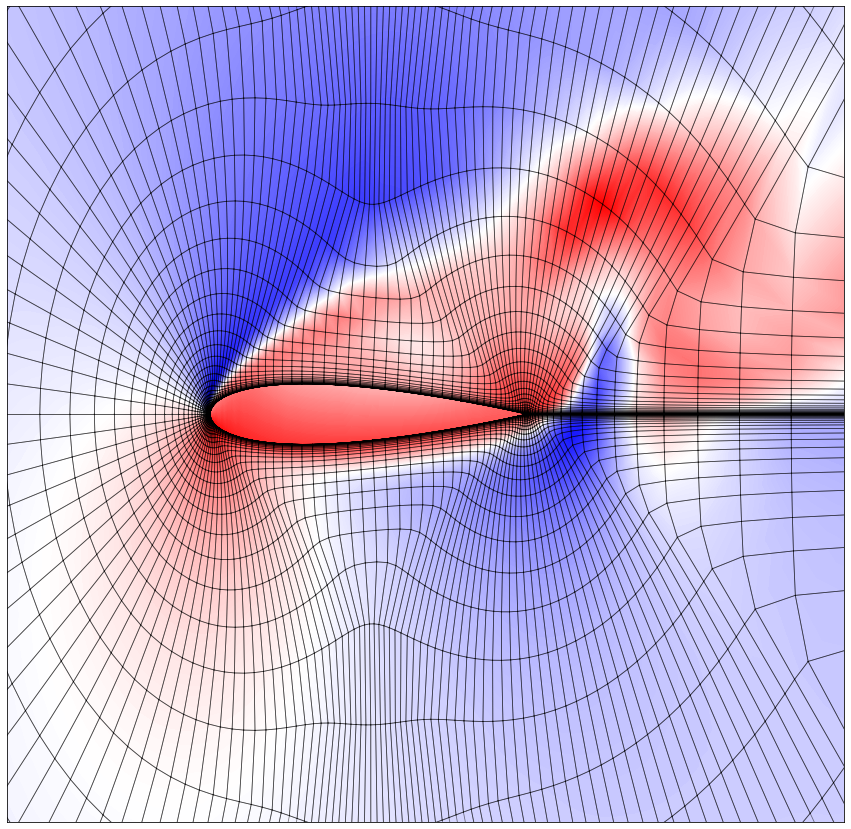

In [15]:
from tqdm import tqdm
import matplotlib.pyplot as plt

mesh_color='black' 
mesh_alpha=0.5
mesh_linewidth=.8

fig, ax = plt.subplots(figsize=(15,15))
x = graph.ndata['x']
y = graph.ndata['y']
values = graph.ndata['Laminar_Viscosity']

lxdown, lydown, lxup, lyup = -.8, -1, 2.5, 1
sc = .8

ax.tricontourf(x, y, values, levels=300, cmap='bwr')
src, dst = graph.edges()
# Beware: this will take some time, since it has to plot all the edges
# Consider using another viewer, e.g. ParaView or not plotting the graph at all
for i in tqdm(range(len(dst))): 
    nodes_x = [x[src[i]], x[dst[i]]]
    nodes_y = [y[src[i]], y[dst[i]]]
    # Trick for skipping many far away nodes
    if nodes_x[0] < lxdown or nodes_x[1] > lxup or nodes_y[0] < lydown or nodes_y[1] > lyup:
        pass
    else:
        ax.plot(nodes_x, 
                 nodes_y, 
                 color=mesh_color, 
                 alpha=mesh_alpha, 
                 linewidth=mesh_linewidth)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)

ax.set_xbound(sc*lxdown, sc*lxup)
ax.set_ybound(sc*lydown, sc*lyup)
plt.savefig(data_file+str('.png'))


## Create video

In [17]:
import shutil # check if ffmpeg is installed
assert shutil.which("ffmpeg"), "ffmpeg is not installed" 
import io
import base64
import os
from IPython.display import HTML

t_dir='data/Unsteady_NACA0012/'
vid_fname = 'airfoil.mp4'
cmd = 'ffmpeg -r 16 -f image2 -i {}/flow_005%2d.vtu.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(
    t_dir, vid_fname
)
os.system(cmd); print('Saving video to: {}'.format(vid_fname))

# Show video
video = io.open(vid_fname, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

Saving video to: airfoil.mp4
